In [94]:
import os
import cv2
from PIL import Image
import numpy as np
from patchify import patchify
#for  normalization of data
from sklearn.preprocessing import MinMaxScaler, StandardScaler
minmaxscaler = MinMaxScaler()
import matplotlib.pyplot as plt
import glob


In [95]:
dataset_root_folder = './dataset/'
dataset_name = 'processed_lai_npy'

In [96]:
os.walk(dataset_root_folder)

<generator object _walk at 0x7f20bd0d4510>

In [97]:
image_patch_size = 180

In [98]:
image = np.load(f'./{dataset_root_folder}/{dataset_name}/32UQV_2001_measure_0.npy')
image_patches = patchify(image, (image_patch_size, image_patch_size), step=image_patch_size)
image_x = image_patches[0,0,:,:]
print(image_x.shape)
print("image_x.shape[-1]", image_x.shape[-1])
print("image_x.reshape(-1, image_x.shape[-1]).shape", image_x.reshape(-1, image_x.shape[-1]).shape)
#minmax_scalar

image_y = minmaxscaler.fit_transform(image_x.reshape(-1, image_x.shape[-1])).reshape(image_x.shape)
#image_y = minmaxscaler.fit_transform(image_x).reshape(image_x.shape)
#image_y.shape

(180, 180)
image_x.shape[-1] 180
image_x.reshape(-1, image_x.shape[-1]).shape (180, 180)


In [99]:
filepaths = glob.glob('./dataset/processed_lai_npy/*.npy')

filepaths.sort()
filepaths = filepaths[:2]

In [100]:
# Dataset preparation

image_dataset = []

for datapath_filename in filepaths:
    #print("datapath_filename", datapath_filename)
    #test = extract_all_LAI_from_RAS_file(datapath_filename, image_length, image_width)
    test = np.load(datapath_filename)
    #print(test.shape)

    #if(month//10==0):
    image = np.load(datapath_filename)
    image[image<0]=0

    if image is not None:
        #print(image.shape)
        #image_dataset.append(image)
        size_x = (image.shape[1]//image_patch_size)*image_patch_size
        size_y = (image.shape[0]//image_patch_size)*image_patch_size
        #print("(image.shape[1]//image_patch_size)", (image.shape[1]//image_patch_size))
        #print("(image.shape[0]//image_patch_size)", (image.shape[0]//image_patch_size))
        #print("{} -- {} - {}".format(image.shape, size_x, size_y))
        #print("before crop", image.shape)
        #plt.imshow(image)
        #plt.savefig('./view_check/img1t.png')
        image = Image.fromarray(image)
        image = image.crop((0, 0, size_x, size_y))
        #print("({} -- {})".format(image.size[0], image.size[1]))
        image = np.array(image)
        #print("after crop", image.shape)


        patched_images = patchify(image, (image_patch_size, image_patch_size), step= image_patch_size)
        #print(len(patched_images))
        #print("patched_images.shape", patched_images.shape)
        for i in range(patched_images.shape[0]):
            for j in range(patched_images.shape[1]):
                individual_patched_image = patched_images[i,j,:,:]
                #print("here : ", individual_patched_image.shape)
                #plt.imshow(individual_patched_image)
                #plt.savefig('./view_check/img'+str(i)+'_'+str(j)+'tt.png')
                #individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
                #individual_patched_image = individual_patched_image[0]
                #print("there",individual_patched_image.shape)
                #if image_type =='images':
                image_dataset.append(individual_patched_image)
                '''elif image_type == 'masks':
                    mask_dataset.append(individual_patched_image)'''
    break

image_dataset = np.array(image_dataset)
unsegnented_image_dataset = image_dataset

/home/luser/anaconda3/envs/stelar/lib/python3.9/site-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (120560400 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [101]:
# find all the unique values in the dataset
unique_values = np.unique(image_dataset)

print("unique_values", unique_values)

unique_values [ 0.     2.5    2.6    2.7    2.8    2.9    3.     3.025  3.05   3.075
  3.1    3.125  3.15   3.175  3.2    3.25   3.3    3.4    3.5    3.6
  3.7    3.75   3.8    3.9    4.     4.025  4.05   4.075  4.1    4.125
  4.15   4.175  4.2    4.25   4.3    4.4    4.5    4.6    4.7    4.75
  4.8    4.9    5.     5.025  5.05   5.075  5.1    5.125  5.15   5.175
  5.2    5.3    5.4    5.5    5.6    5.7    5.8    5.9    6.     6.025
  6.05   6.075  6.1    6.125  6.15   6.175  6.2    6.3    6.4    6.5
  6.6    6.7    6.75   6.8    6.9    7.     7.025  7.05   7.075  7.1
  7.125  7.15   7.175  7.2    7.25   7.5    7.75   8.     8.025  8.05
  8.075  8.1    8.125  8.15   8.175  8.2    8.25   8.5    8.75   9.
  9.025  9.05   9.075  9.1    9.125  9.15   9.175  9.2    9.25   9.5
  9.75  10.    10.025 10.05  10.075 10.1   10.125 10.15  10.175 10.2
 10.225 10.275 10.3   10.325 10.35  10.375 10.4   10.425 10.45  10.475
 10.6   10.65  10.675 10.7   10.725 10.75  10.775 10.8   10.825 10.85
 10.875 

In [102]:
len(unique_values)


366

In [103]:
len(unique_values)
# Now replace all the unique values with the range of 0 to 366
for i, unique_value in enumerate(unique_values):
    image_dataset[image_dataset==unique_value] = i


    


In [104]:
np.unique(image_dataset)

array([  0.,   1.,   2.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 150., 151., 152., 153.,
       154., 155., 156., 157., 158., 159., 160., 161., 162., 163., 164.,
       165., 166., 167., 168., 169., 170., 171., 17

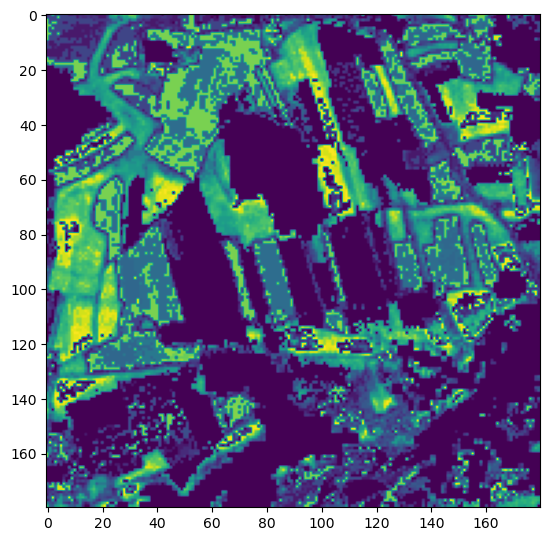

In [105]:
plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[0])


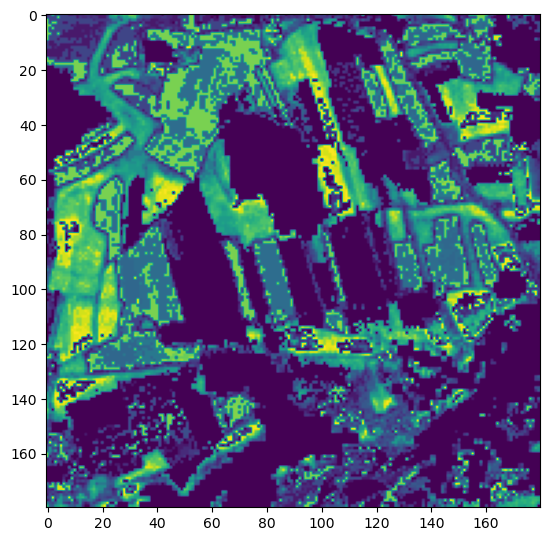

In [106]:
plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(unsegnented_image_dataset[0])
